## STAT 207 Lab 10: Regularized Logistic Regression

Due: Wednesday, December 4, 23:59:59

### Jaewon Kim jaewonk3

This lab consists of 4 main parts. You may add as many cells as you need in order to do the exercises. To add cells use the "Insert" tab from the menu bar above and select "insert cell above" or "insert cell below". 

Please use Markdown cells above or below your code cells to explain your results. Make sure graders know that you understand what your code is doing.

**Hint: all of the problems build on the class notes, so the notes are the first place to go for related examples and discussion.**


The data for this assignment are in two files: "clinical_data.csv" and "gene_expr.csv". Both files refer to subjects in a study on using gene expression data to predict recurrence of breast cancer among patients treated with tamoxifan. 

+ "clinical_data.csv" contains information about patient status including whether or not they had a recurrence of breast cancer: Status='R' means they had a recurrence. Status='RF' means they were recurrence free.

+ "gene_expr.csv" contains gene expression measurements for a sample of 50 genes.

The rows of the two files correspond to the same patients, e.g., the 10th row in each file refers to the same patient, in one file, her clinical status, and in the other file, her gene expression information.

### Part 1: Data Preparation (5 pts)

**a) (1 pt) Read the gene expression data into a feature matrix (data frame) X. Display the dimensions of X and its first few rows, including column names.**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
X = pd.read_csv('gene_expr.csv')
X.head(10)

,X159,X960,X980,X986,X1023,X1028,X1064,X1092,X1103,X1109,...,X1563,X1574,X1595,X1597,X1609,X1616,X1637,X1656,X1657,X1683
0,0.739512,1.971036,-1.660842,2.777183,3.299062,-1.954834,2.784970,0.411848,3.974931,-0.979751,...,3.221117,-1.735267,-2.036134,3.114202,-1.567229,-2.100264,-2.067843,2.116261,-2.057195,-0.868534
1,2.037903,2.197854,-1.263034,4.082346,5.426886,-1.732520,3.085890,0.688056,4.503384,-1.185032,...,2.927229,-1.646363,0.127756,2.772590,-1.451107,0.267480,-1.526069,2.643856,-1.625604,-1.415037
2,2.218338,3.471559,-1.789433,2.829994,4.746466,-2.222392,2.977280,0.944858,4.021099,-1.825502,...,3.565945,-2.296393,-2.347923,3.577213,-2.175087,-2.084889,-2.106915,2.738768,-1.387816,-0.780555
3,0.972344,2.638734,-2.010999,3.913935,4.744161,-2.496426,3.139577,0.155651,4.632121,-1.671513,...,3.815160,-1.706846,-2.216318,3.168707,-1.844349,-2.010999,-1.996352,2.797407,-1.743066,-1.010999
4,2.412235,4.033491,-1.536501,4.239650,4.304348,-1.991067,3.700095,0.878536,4.295705,-2.141092,...,4.264107,-2.424026,-2.448274,3.717911,-2.286523,-2.045515,-1.776328,2.813104,-2.353637,-1.687061
5,1.244203,3.485278,-1.838879,3.354405,3.596351,-2.372703,2.537772,-0.042187,4.409049,-1.824082,...,3.870400,-2.081240,-2.229338,3.370172,-2.063752,-1.995848,-1.946939,2.648671,-1.697325,-1.107875
6,1.022242,2.312934,-1.597241,2.838456,4.425506,-1.882643,2.239754,0.777947,4.401796,-1.049753,...,2.605197,-2.145677,-2.219678,3.536966,-1.975752,-1.975752,-2.008174,2.417328,-2.024662,-1.456378
7,1.589521,2.506791,-1.659925,4.276949,4.283059,-1.911463,2.003420,1.284934,4.651143,-2.074962,...,2.540925,-2.496426,-2.548893,4.814187,-2.174498,-2.174498,-2.195256,2.246966,-2.548893,-1.259387
8,1.047177,2.971751,-1.541659,3.551610,4.324723,-1.866498,3.437098,0.301806,5.121727,-1.408392,...,3.552632,-2.138303,-2.138303,2.833941,-1.941266,-1.988060,-1.895942,2.615933,-2.120816,-1.576992
9,1.101824,2.743575,-1.366782,3.725140,4.569959,-1.527247,3.469656,0.828234,4.091210,-1.723939,...,2.476285,-1.660514,-1.790281,2.845405,-1.555816,-1.740241,-1.790281,1.692111,-1.790281,-1.280809


**b) (2 pts) Read the clinical data into a data frame. Create a target array y with values: y=1 if the patient's Status was 'RF', and y=0 if the patient's Status was 'R'. Display dimensions and the first few elements of y.**

In [3]:
Y = pd.read_csv('clinical_data.csv')

In [4]:
y = Y['Status'].map({'RF':1, 'R':0})
y.head(10)

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: Status, dtype: int64

**c) (2 pts) Check that X and y have the same index labels (row labels) using the command:**

    display(y.index, X.index)
    
**If the index values don't match, set the index of one of them equal to the index of the other and check again. If they match, you're good to go.**

In [5]:
display(y.index, X.index)

RangeIndex(start=0, stop=155, step=1)

RangeIndex(start=0, stop=155, step=1)

### Part 2: Data Summary and Visualization (7 pts)

**a) (3 pts) Use python commands to calculate the number of patients who had a recurrence versus the number recurrence free. Display the value counts and also show a bar plot. Hint: for this part you might find it simpler to work with the 'Status' colmn in the clinical data frame instead of y.**

In [6]:
rf = y[y == 1]
r = y[y == 0]
a = rf.count()
b = r.count()
print("Recurrence Free")
print(a)
print("Recurrence")
print(b)

Recurrence Free
103
Recurrence
52


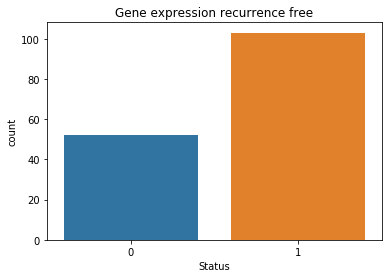

In [7]:
sns.countplot(y)
plt.title('Gene expression recurrence free')
plt.show()

**b) (4 pts) Create a heat map comparing the mean gene expression levels for the 50 genes between the two groups y=0 and y=1. For an example see the notes, "14_Cross_Validation".**

In [8]:
mean_matrix = np.array((X[Y.Status == 'RF'].mean(), X[Y.Status == 'R'].mean()))
display(mean_matrix.shape, mean_matrix)

(2, 50)

array([[ 1.56798571,  0.1962681 ,  2.98462212,  1.02195254,  1.68082058,
        -0.80957861, -0.02140004,  1.87519558,  1.32825255,  2.44217944,
         2.10191224,  1.50983549,  0.0430508 ,  0.24617898, -0.07404643,
        -0.06154795,  0.51447155, -0.12786741,  2.53145087,  1.1115375 ,
         0.03052709,  1.14482828,  0.62111883, -0.07720047,  1.84976067,
         4.56382857,  0.93425828,  0.55001195,  0.31350123,  1.47539763,
        -0.11736987,  0.97545099, -0.54165141,  0.55684188,  1.95112203,
         1.70536502,  4.42449347,  0.90768573,  1.62606193,  1.50891769,
         1.09433134,  1.42203575,  1.48487912,  1.96863215,  0.28497724,
         1.5407355 ,  0.13207107,  0.47295854,  0.06481589,  1.98687141],
       [ 0.94208999, -0.70835985,  4.42800939,  0.22314398,  0.58646673,
        -0.19781425, -0.96051737,  2.99457657,  0.25382152,  3.82345586,
         0.88689281,  0.73372491, -0.65861886, -1.07816229, -1.09895235,
        -0.72283374, -0.13209789, -0.93095301,  1.

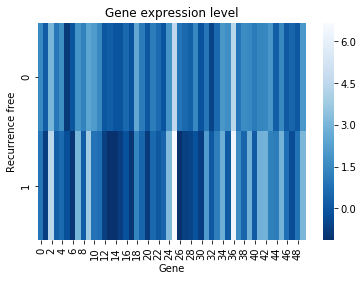

In [9]:
sns.heatmap(mean_matrix, annot = False, linewidths = 0,
           square = False, cmap = 'Blues_r');
plt.ylabel('Recurrence free');
plt.xlabel('Gene');
all_sample_title = 'Gene expression level'
plt.title(all_sample_title, size = 12);
plt.show()

### Part 3: Preliminary Logistic Regression Analysis (8 pts)

**a) (5 pts) As illustrated in the notes, the sklearn.linear_model function LogisticRegression can fit several kinds of regularized logistic regrsion models. Using the data you formatted in Part 1, fit an L1 regularized logistic regression model using your feature matrix and target array. In order to achieve convergence, it might be necessary to increase the maximum number of interations allowed to at least 1000, and use an inverse penalty C less than 1. You might have to experiment to find a combination that converges. (see the notes, and online documentation available by Googling 'sklearn logistic regression' for details.**

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
G = LogisticRegression(penalty = 'l1', solver = 'liblinear', C = 0.5, max_iter = 1000)
G.fit(X, y)

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

**b) (3 pts) For the regularized logistic regression model you fit in a), display the coefficient vector for the features. How many features have non-zero coefficients?**

In [12]:
yhat = G.coef_
yhat

array([[ 0.92843591,  0.        ,  0.34300186,  0.        ,  0.19558931,
        -0.00833317,  0.        , -0.29321014,  0.        ,  0.        ,
         0.25248705,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.48879189,  0.        ,  0.        ,  0.02872314,
         0.        ,  0.        ,  0.07836703, -0.18435926, -0.16186377,
         0.        ,  0.        ,  0.        ,  0.04824449,  0.05455894,
         0.33414211, -0.22436   , -0.2006608 ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -0.06145104,  0.        ,  0.03298719,  0.        ,
         0.        ,  0.        ,  0.        , -0.25931721, -0.12632187]])

In [13]:
np.sum([yhat != 0])

20

### Part 4: Cross-validated classification accuracy (5 pts)

**a) (4 pts) Rerun the L1 regularized logistic regression using 5-fold cross-validation to estimate the accuracy of the logistic regression model for using the gene expression information to predict the recurrence or non-recurrence of breast cancer for these patients. Display the accuracy results for the 5 train/test splits in the cross-validation. For details, see the cross validation notes and the online documentation for the sklearn function cross_val_score.**

In [14]:
from sklearn.model_selection import cross_val_score

In [15]:
score = cross_val_score(G, X, y, cv = 5)
score

array([0.84375   , 0.78125   , 0.77419355, 0.6       , 0.4       ])

**b) (1 pt) Compute the mean and standard error for classification accuracy.**

In [16]:
m = score.mean()
s = score.std()/np.sqrt(5)
print("Mean:", m)
print("Standard Error:", s)

Mean: 0.6798387096774194
Standard Error: 0.07231539794121623
